## Import Pandas and matplotlib in order to analyze state data on cannabis licensing

In [9]:


!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Import CSV file containing all licensed cannabis retailers and handlers, as well as applicants who have obtained proximity protection. Make python read the "Issued Date" as a datetime instead of an object. 

In [32]:
df = pd.read_csv("../data/Current_OCM_Licenses_20241024.csv", parse_dates=["Issued Date"])

/var/folders/k7/0c943ysn1rxb3chh64qv_8wh0000gn/T/ipykernel_64526/1286382921.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/Current_OCM_Licenses_20241024.csv", parse_dates=["Issued Date"])


In [66]:
df.head(5)

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,Application Number,SEE Category,...,Processing Activities Extraction,Processing Activities Blending and Infusing,Processing Activities Packaging and Labeling,Processing Activities Branding,Retail Activities Sales with Delivery,Retail Activities Sales No Delivery,Retail Activities Non-Cannabis Products,Retail Activities Drive Thru,Retail Date Opened to Public,Primary Contact Name
0,OCM-PROC-24-000096,Adult-Use Processor License,OCMPROC,Active,LICACT,2024-09-12,09/12/2024 12:00:00 AM,09/12/2026 12:00:00 AM,OCMPROC-2023-000306,Women-Owned Business,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,Lori Gronman
1,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,2024-07-10,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,OCMRETL-2023-001433,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,Jon-Eric Aben
2,NaN,Adult-Use Retail Dispensary License,OCMRETL,In-Process,Pending,NaT,NaN,NaN,OCMRETL-2023-001318,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,Avie Li
3,OCM-CAURD-24-000177,Conditional Adult-Use Retail Dispensary License,OCMCAURD22,Active,LICACT,2024-08-02,08/02/2024 12:00:00 AM,08/02/2026 12:00:00 AM,OCMCAURDP-2023-000228,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,John Guercia
4,NaN,Adult-Use Retail Dispensary License,OCMRETL,In-Process,Pending,NaT,NaN,NaN,OCMRETL-2023-001114,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,Prashant Parikh


#### Pull the names of all columns in the CSV file to determine how I want to narrow it down

In [37]:
df.columns

Index(['License Number', 'License Type', 'License Type Code', 'License Status',
       'License Status Code', 'Issued Date', 'Effective Date',
       'Expiration Date', 'Application Number', 'SEE Category', 'Entity Name',
       'DBA', 'Location ID', 'Address Line 1', 'Address Line 2', 'City',
       'State', 'Zip Code', 'County', 'Region', 'Latitude', 'Longitude',
       'Business Website', 'Operational Status', 'Business Purpose',
       'Tier Type', 'Processor Type', 'Cultivation Indoor',
       'Cultivation Outdoor', 'Cultivation Mixed Light',
       'Cultivation Combination', 'Cultivation Activities Drying Curing',
       'Cultivation Activities Storage', 'Cultivation Activities Packaging',
       'Cultivation Activities Waste Rendering',
       'Processing Activities Extraction',
       'Processing Activities Blending and Infusing',
       'Processing Activities Packaging and Labeling',
       'Processing Activities Branding',
       'Retail Activities Sales with Delivery',
     

#### Determine the number of each type of license has been issued as of 10/24/2024

In [38]:
df["License Type"].value_counts()

License Type
Adult-Use Retail Dispensary License                     508
Conditional Adult-Use Retail Dispensary License         316
Adult-Use Microbusiness License                         307
Adult-Use Processor License                             298
Adult-Use Cultivator License                            246
Adult-Use Distributor License                           167
Registered Organization                                  26
Adult-Use Registered Organization Dispensary License     17
Name: count, dtype: int64

#### Create a new filtered dataframe with the columns I want to use for my analysis: License Type and Issued Date

In [39]:
dfa = df[["License Type","Issued Date"]]

In [40]:
dfa.head()

,License Type,Issued Date
0,Adult-Use Processor License,2024-09-12
1,Adult-Use Retail Dispensary License,2024-07-10
2,Adult-Use Retail Dispensary License,NaT
3,Conditional Adult-Use Retail Dispensary License,2024-08-02
4,Adult-Use Retail Dispensary License,NaT


#### Remove all nulltypes from "Issued Date" so my data includes only licenses that have already been issued

In [41]:
df1 = dfa.loc[lambda x: ~x["Issued Date"].isnull()].copy()

#### Reclassify the license types into two categories: CAURD and non-CAURD

In [42]:
df1["is_caurd"]= df1["License Type"].apply(lambda x: "CAURD" if x == "Conditional Adult-Use Retail Dispensary License" else "Non-CAURD")

In [43]:
df1.head()

,License Type,Issued Date,is_caurd
0,Adult-Use Processor License,2024-09-12,Non-CAURD
1,Adult-Use Retail Dispensary License,2024-07-10,Non-CAURD
3,Conditional Adult-Use Retail Dispensary License,2024-08-02,CAURD
5,Adult-Use Retail Dispensary License,2024-06-21,Non-CAURD
7,Adult-Use Retail Dispensary License,2024-07-16,Non-CAURD


#### Import datetime to use for my analysis

In [49]:
import datetime

#### Create new datetime column to use only the month and the year in my dataframe

In [50]:
df1["Month/Year Issued"] = df1["Issued Date"].apply(lambda x: datetime.date(x.year, x.month, 1))

#### Create new dataset filtering the dataset to is_caurd and month/year, count number of CAURD and Non-CAURD licenses issued in each month, and unstack to turn series to dataframe

In [63]:
## group by is_caurd and month/year, count to create totals, unstack to turn series to dataframe

df_monthly_totals = df1.groupby(["Month/Year Issued", "is_caurd"])["License Type"].count().unstack()

In [65]:
df_monthly_totals.head()

is_caurd,CAURD,Non-CAURD
Month/Year Issued,,
2022-12-01,1.0,NaN
2023-01-01,1.0,NaN
2023-02-01,2.0,NaN
2023-03-01,3.0,NaN
2023-04-01,1.0,NaN


#### Plot the new dataframe into a graph that demonstrates how many CAURD versus Non-CAURD licenses have been issued each month since the rollout of legal cannabis licenses

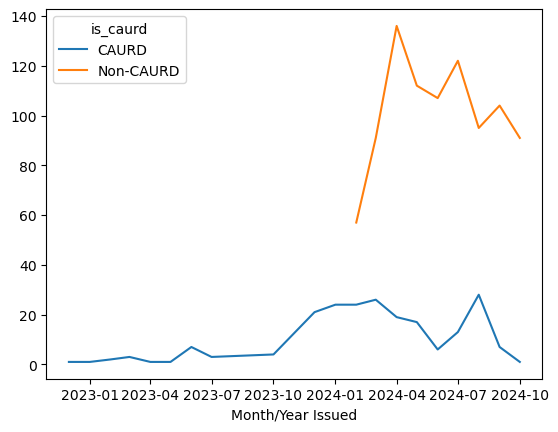

In [71]:
df_monthly_totals.plot()
plt.savefig('../output/chart.png')

#### output final dataset